In [ ]:
# libraries we'll use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ignore; visualization stuff
plt.style.use('ggplot')
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10


In [ ]:
import os
current_dir = os.getcwd()
print(f"Current working directory: {current_dir}")

# List files in the current working directory
print("Files in current directory:")
!ls


Current working directory: /content
Files in current directory:
sample_data


In [ ]:
# libraries we'll use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from google.colab import drive # Import drive from google.colab
import shutil # Import the shutil module for file operations

# ignore; visualization stuff
plt.style.use('ggplot')
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

# Get the current working directory
current_dir = os.getcwd()
print(f"Current working directory: {current_dir}")

# List files in the current working directory initially
print("Files in current directory (before copy):")
!ls

# --- Mount Google Drive ---
# This will prompt you to authorize access to your Google Drive.
drive.mount('/content/drive')

# --- Define the source path in Google Drive and the destination path (CWD) ---
# Replace 'Your_Folder_Name' with the actual folder(s) where your file is located within My Drive.
google_drive_source_path = '/content/drive/My Drive/abra_price.csv' # <--- CHANGE THIS PATH
current_directory_destination_path = './abra_price.csv' # Copy to the current directory

# --- Copy the file from Google Drive to the current working directory ---
if os.path.exists(google_drive_source_path):
    print(f"File found in Google Drive at: {google_drive_source_path}")
    try:
        # Using shutil.copy to copy the file
        shutil.copy(google_drive_source_path, current_directory_destination_path)
        print(f"File copied to current directory: {current_directory_destination_path}")

        # Verify the file is now in the current directory
        print("\nFiles in current directory (after copy):")
        !ls

        # --- Now, read the CSV file from the current directory ---
        prices = pd.read_csv('abra_price.csv')
        print("\nFile loaded successfully from the current directory.")
        print(prices.head())

    except FileNotFoundError:
         print(f"Error: Source file not found in Google Drive at the specified path: {google_drive_source_path}")
    except Exception as e:
        print(f"An error occurred during file copy or reading: {e}")
else:
    print(f"Error: File not found in Google Drive at the specified path: {google_drive_source_path}")
    print("Please check the Google Drive path and ensure you have mounted your Google Drive correctly.")


Current working directory: /content
Files in current directory (before copy):
sample_data
Mounted at /content/drive
File found in Google Drive at: /content/drive/My Drive/abra_price.csv
File copied to current directory: ./abra_price.csv

Files in current directory (after copy):
abra_price.csv	drive  sample_data

File loaded successfully from the current directory.
   timestamp  bid_price_1  bid_volume_1  bid_price_2  bid_volume_2  \
0          0         1968            30          NaN           NaN   
1          1         1969             4       1967.0          31.0   
2          2         1966             1       1965.0          21.0   
3          3         1965            25          NaN           NaN   
4          4         1966            25          NaN           NaN   

   bid_price_3  bid_volume_3  ask_price_1  ask_volume_1  ask_price_2  \
0          NaN           NaN         1971            30          NaN   
1          NaN           NaN         1971            31          NaN

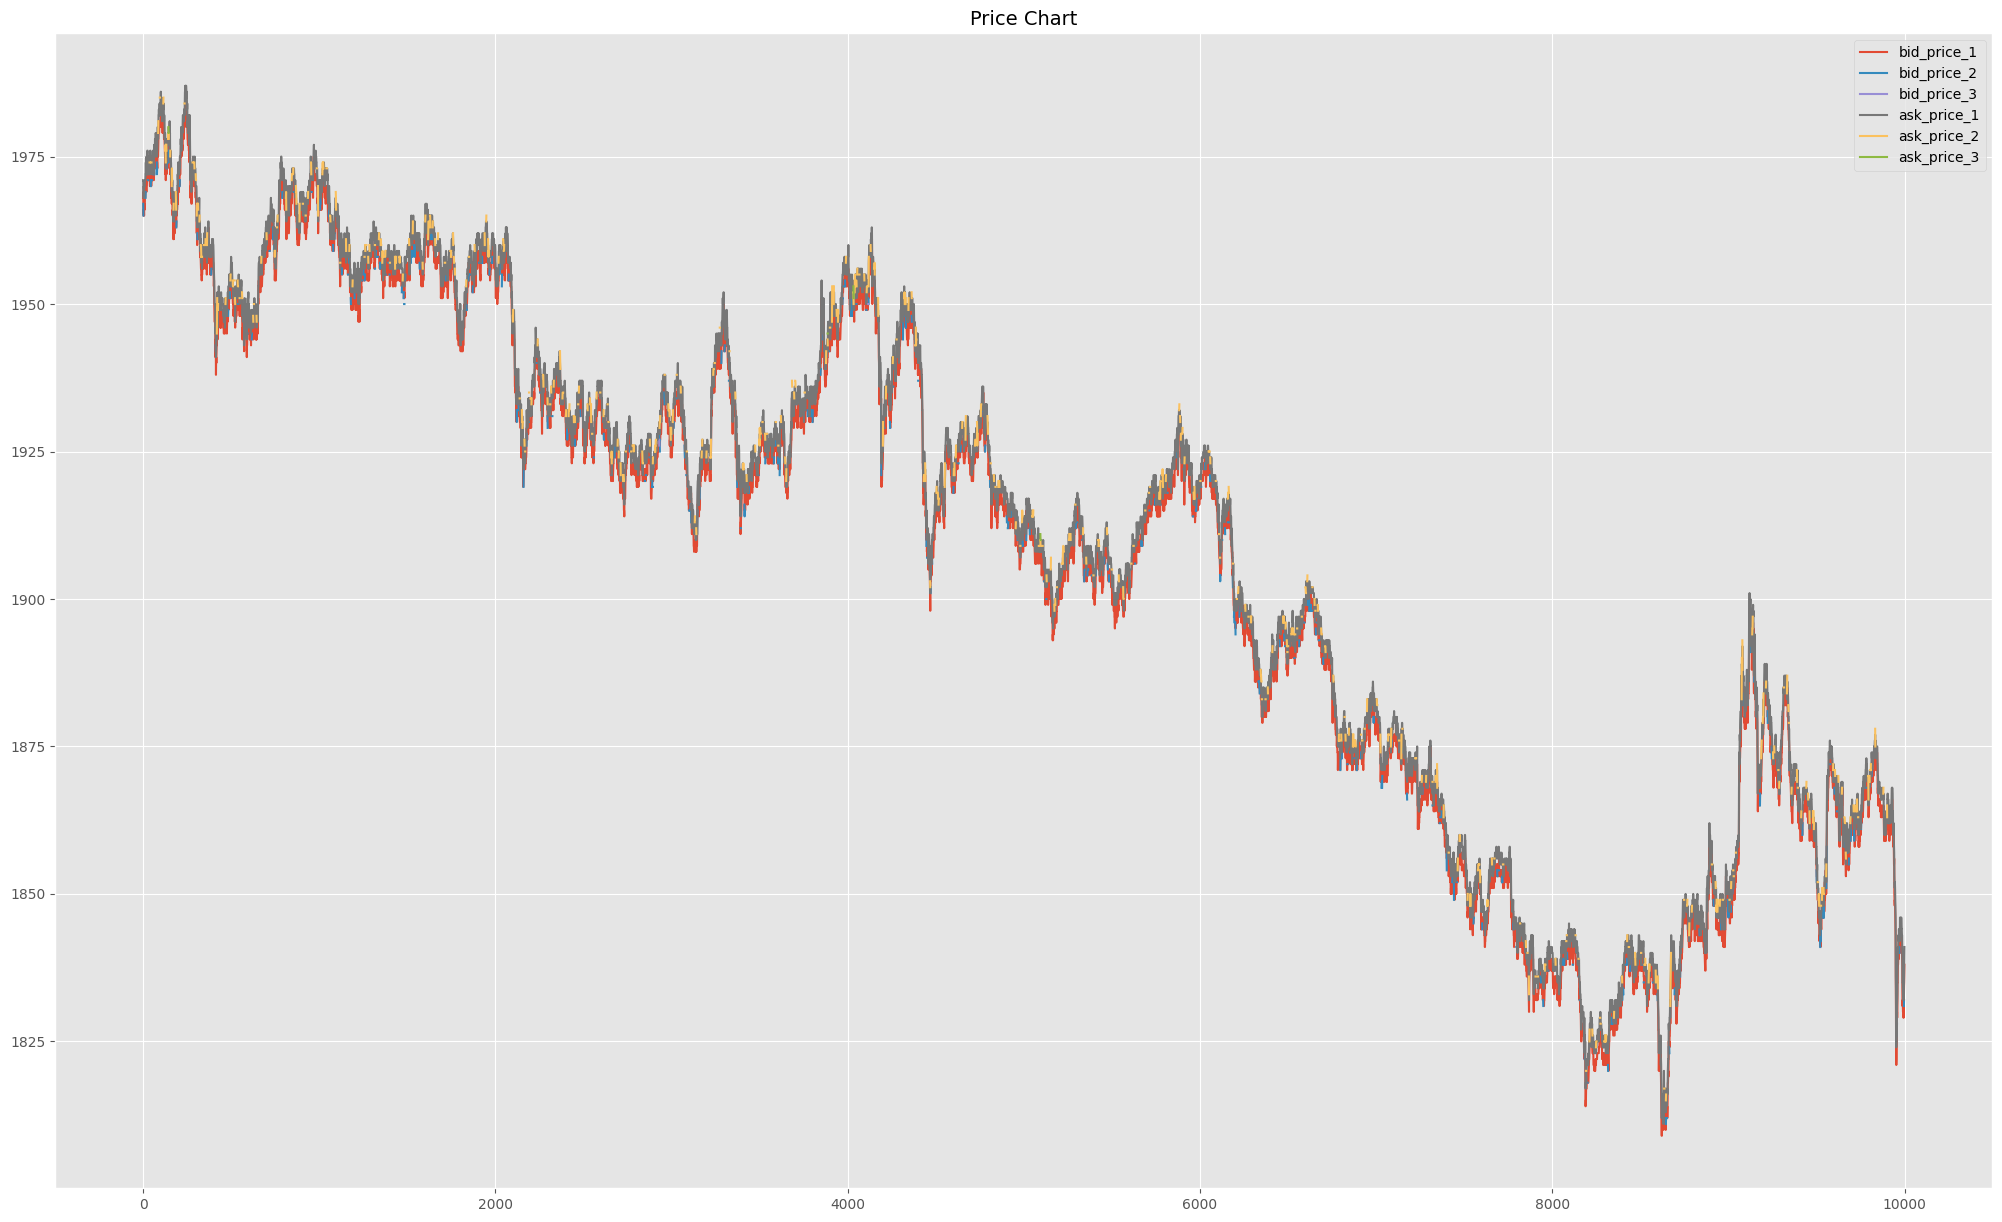

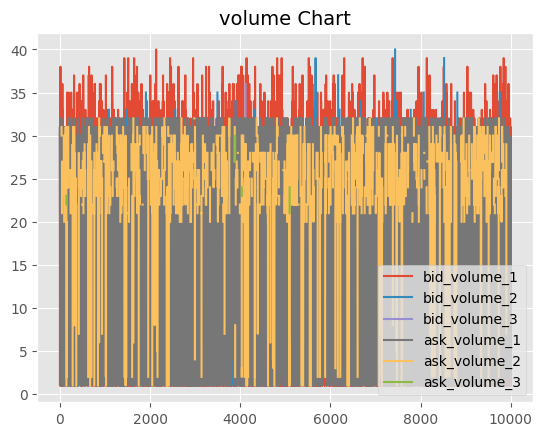

In [ ]:

ts = prices['timestamp']
bp1 = prices['bid_price_1']
bp2 = prices['bid_price_2']
bp3 = prices['bid_price_3']
bv1 = prices['bid_volume_1']
bv2 = prices['bid_volume_2']
bv3 = prices['bid_volume_3']
ap1 = prices['ask_price_1']
ap2 = prices['ask_price_2']
ap3 = prices['ask_price_3']
av1 = prices['ask_volume_1']
av2 = prices['ask_volume_2']
av3 = prices['ask_volume_3']

plt.figure(figsize=(25,15))
price_dict = {
    'bid_price_1': bp1,
    'bid_price_2': bp2,
    'bid_price_3': bp3,
    'ask_price_1': ap1,
    'ask_price_2': ap2,
    'ask_price_3': ap3,
}
volume_dict = {
    'bid_volume_1': bv1,
    'bid_volume_2': bv2,
    'bid_volume_3': bv3,
    'ask_volume_1': av1,
    'ask_volume_2': av2,
    'ask_volume_3': av3,
}

for label, price_series in price_dict.items():
    plt.plot(ts, price_series, label=label)
plt.title('Price Chart')
plt.legend()
plt.show()
for label, price_series in volume_dict.items():
    plt.plot(ts, price_series, label=label)
plt.title('volume Chart')
plt.legend()
plt.show()

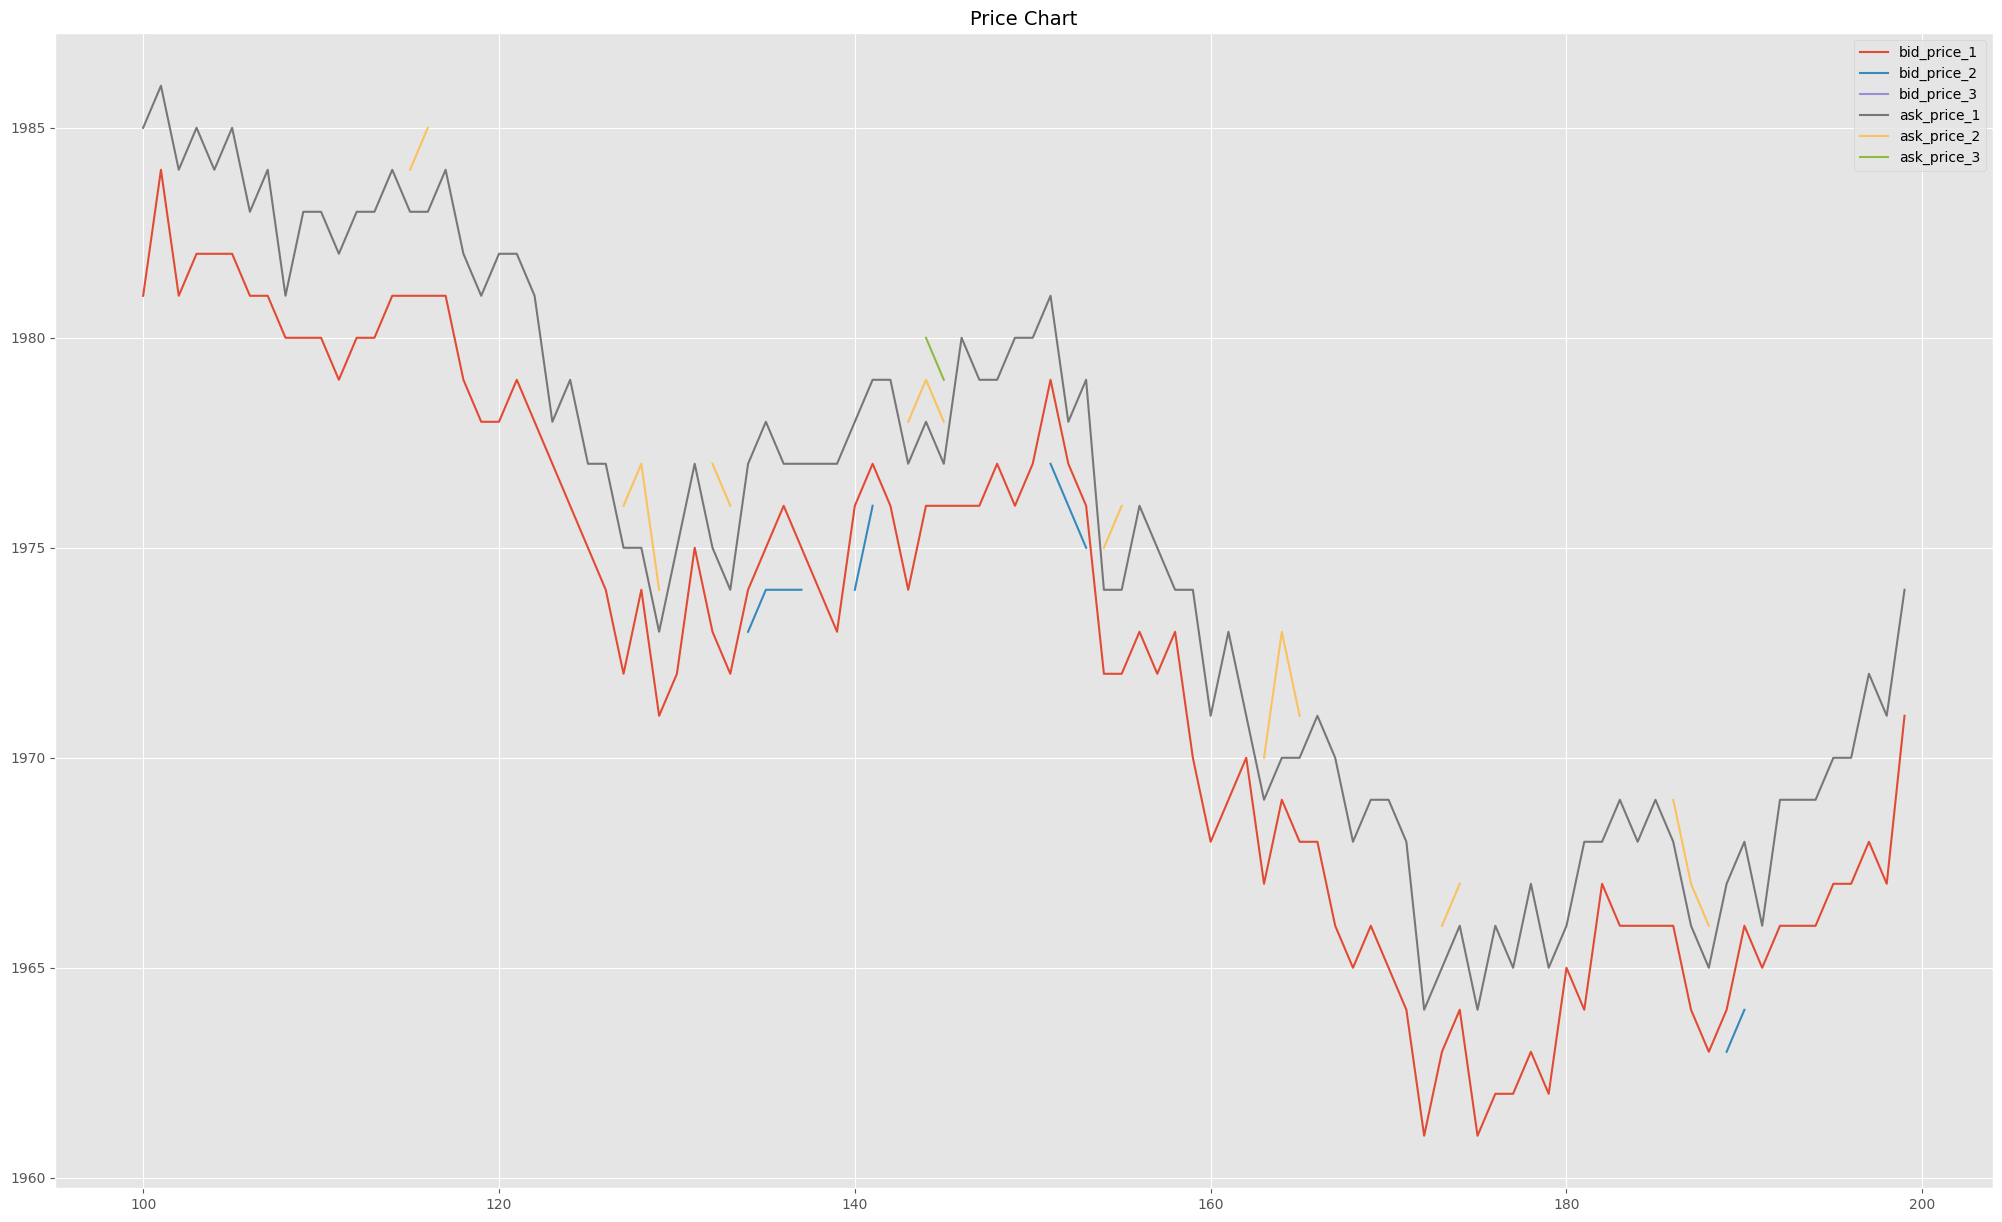

In [ ]:
# slice
prices_sliced = prices[100:200]

# copy paste our previous cell and hit run
ts = prices_sliced['timestamp']
bp1 = prices_sliced['bid_price_1']
bp2 = prices_sliced['bid_price_2']
bp3 = prices_sliced['bid_price_3']
ap1 = prices_sliced['ask_price_1']
ap2 = prices_sliced['ask_price_2']
ap3 = prices_sliced['ask_price_3']

sell = np.full_like(ts, 1852)
buy = np.full_like(ts, 1899)

plt.figure(figsize=(25,15))
price_dict = {
    'bid_price_1': bp1,
    'bid_price_2': bp2,
    'bid_price_3': bp3,
    'ask_price_1': ap1,
    'ask_price_2': ap2,
    'ask_price_3': ap3,
    #'buy': buy,
    #'sell': sell
}

for label, price_series in price_dict.items():
    plt.plot(ts, price_series, label=label)
plt.title('Price Chart')
plt.legend()
plt.show()

In [2]:


class Trader:
    def __init__(self):
        # Load data once during initialization
        self.prices = pd.read_csv('data/abra_price.csv')
        self.cp = (self.prices['bid_price_1'] + self.prices['ask_price_1']) / 2

    def SMA(self, prices, period):
        return prices.rolling(window=period).mean()

    def calculate_bollinger_bands(self, prices, period=20, std_multiplier=2.0):
        middle_band = self.SMA(prices, period)
        std_deviation = prices.rolling(window=period).std(ddof=1)
        upper_band = middle_band + (std_multiplier * std_deviation)
        lower_band = middle_band - (std_multiplier * std_deviation)
        return upper_band, middle_band, lower_band

    def MM(self, prices):
        best_bid = prices['bid_price_1'].iloc[-1]  # Get last value
        best_ask = prices['ask_price_1'].iloc[-1]
        min_desired_spread = 0.01
        mid_price = (best_bid + best_ask) / 2
        spread = best_ask - best_bid
        if spread > min_desired_spread:
            buy_price = mid_price - spread/2
            sell_price = mid_price + spread/2
            return buy_price, sell_price
        return 0, 0

    def calculate_rsi(self, prices, period=14):
        delta = prices.diff()
        gain = delta.where(delta > 0, 0)
        loss = -delta.where(delta < 0, 0)

        avg_gain = gain.rolling(window=period).mean()
        avg_loss = loss.rolling(window=period).mean()

        rs = avg_gain / avg_loss
        rsi = 100 - (100 / (1 + rs))
        return rsi

    def run(self, state, current_position):
        result = {}
        orders: List[Order] = []

        # Use the last price only
        current_price = self.cp.iloc[-1]

        # Market Making
        buy_price, sell_price = self.MM(self.prices)
        if buy_price > 0 and sell_price > 0:
            orders.append(Order("PRODUCT", buy_price, 10))
            orders.append(Order("PRODUCT", sell_price, -10))

        # High/Low Breakout
        lookback = 20
        recent_high = max(self.cp[-lookback:])
        recent_low = min(self.cp[-lookback:])

        if current_price > recent_high:
            orders.append(Order("PRODUCT", current_price, 10))
        elif current_price < recent_low:
            orders.append(Order("PRODUCT", current_price, -10))

        # RSI
        rsi = self.calculate_rsi(self.cp).iloc[-1]
        if rsi > 70:
            orders.append(Order("PRODUCT", current_price, -10))
        elif rsi < 30:
            orders.append(Order("PRODUCT", current_price, 10))

        # Bollinger Bands
        upper, middle, lower = self.calculate_bollinger_bands(self.cp)
        if current_price > upper.iloc[-1]:
            orders.append(Order("PRODUCT", current_price, -10))
        if current_price < lower.iloc[-1]:
            orders.append(Order("PRODUCT", current_price, 10))

        result["PRODUCT"] = orders
        return result